In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [9]:
from sqlalchemy import create_engine, inspect
inspector = inspect(engine)
inspector.get_table_names()
columns=inspector.get_columns('measurement')
for column in columns:
    print(column['name'], column['type'])
    

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
columns=inspector.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


2016-08-23


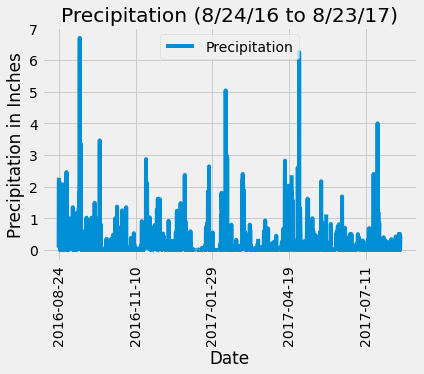

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)

# Perform a query to retrieve the data and precipitation scores
scores = session.query(Measurement.prcp, Measurement.date).\
filter(Measurement.date> last_year).\
order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
scores_df = pd.DataFrame(scores).set_index('date')

# Sort the dataframe by date

# I have aready soretd by date in the query section by performing 0rder_by 
scores_df.dropna()
scores_df

# Use Pandas Plotting with Matplotlib to plot the data
scores_df.plot()
plt.xlabel("Date")
plt.ylabel("Precipitation in Inches")
plt.title("Precipitation (8/24/16 to 8/23/17)")
plt.legend(["Precipitation"])
plt.xticks(rotation=90)
plt.show()



In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
scores_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Station.id).count()
print(stations)

9


In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.id)).group_by(Measurement.station).\
               order_by(func.count(Measurement.id).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_number = 'USC00519281'
session.query(func.min(Measurement.tobs),
              func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).filter(Measurement.station == station_number).all()

[(54.0, 85.0, 71.66378066378067)]

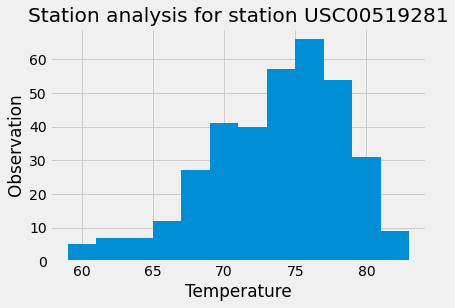

In [27]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
observation_data= session.query(Measurement.date, Measurement.tobs).filter(Measurement.station=='USC00519281'). filter(Measurement.date > last_year)


observation_df=pd.DataFrame(observation_data).rename(columns={ 0:"date",
                                                 1: "tobs"})
plt.hist(observation_df["tobs"], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Observation")
plt.title("Station analysis for station USC00519281")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()